In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### when will we hit 2C of global warming?

#### load & check

In [2]:
df = pd.read_csv("hadcrut-5.0.1.0-annual.csv.bz2")
df.head()

,Time,Anomaly (deg C),Lower confidence limit (2.5%),Upper confidence limit (97.5%)
0,1850,-0.417659,-0.589203,-0.246115
1,1851,-0.233350,-0.411868,-0.054832
2,1852,-0.229399,-0.409382,-0.049416
3,1853,-0.270354,-0.430009,-0.110700
4,1854,-0.291630,-0.432824,-0.150436


In [3]:
df.rename(columns={'Anomaly (deg C)': 'degrees'}, inplace=True)
df.rename(columns={'Lower confidence limit (2.5%)': 'low_c'}, inplace=True)
df.rename(columns={'Upper confidence limit (97.5%)': 'upper_c'}, inplace=True)

In [4]:
df.head()

,Time,degrees,low_c,upper_c
0,1850,-0.417659,-0.589203,-0.246115
1,1851,-0.233350,-0.411868,-0.054832
2,1852,-0.229399,-0.409382,-0.049416
3,1853,-0.270354,-0.430009,-0.110700
4,1854,-0.291630,-0.432824,-0.150436


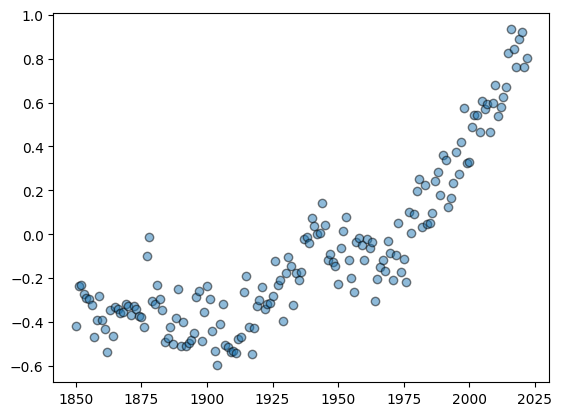

In [5]:
_ = plt.scatter(df.Time, df.degrees, edgecolor='k', alpha=0.5)

Over the last 170 years we can see that the global tempurature has<br>
progressively increased and is projeted to keep increasing

#### baseline anomaly

In [6]:
baseline_start = 1850
baseline_end = 1900

baseline_anomaly = df.loc[(df['Time'] >= baseline_start) & (df['Time'] <= baseline_end), 'degrees'].mean()
baseline_anomaly # baseline anomaly is -0.35C

-0.35650217072549023

#### when will we hit 2C?

In [7]:
df2 = df[df['Time'] >= 1953]

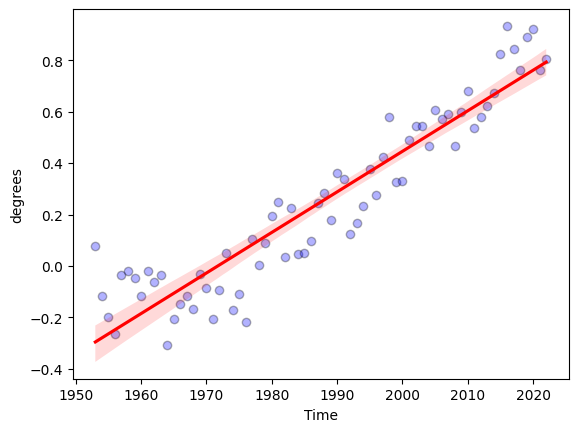

In [8]:
import seaborn as sns

_ = sns.regplot(x = "Time", y = "degrees",
                scatter_kws = {"color":"blue", "alpha":0.3,
                               "edgecolor":"black"},
                line_kws={"color":"red"},
                data=df2)